In [1]:
import numpy as np

In [2]:
import pandas as pd

In [24]:
df=pd.read_csv(r"C:/Users/KIIT/Downloads/laptop_price - dataset.csv")
#kaggle dataset#

In [25]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
X = df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)']]

In [28]:
Y=df['Price (Euro)']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
model=LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred=model.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)

In [38]:
mse

174767.41318879186

In [40]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-96.0125672  336.39968949  96.38295681  36.24780224]
Intercept: 923.3616244654409


In [44]:
import matplotlib.pyplot as plt

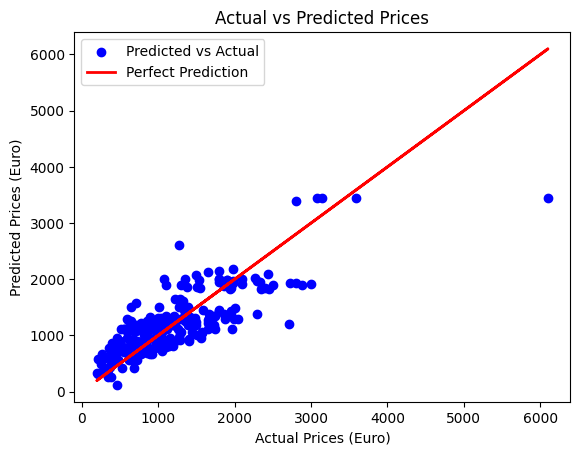

In [45]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction')  # Straight line
plt.xlabel('Actual Prices (Euro)')
plt.ylabel('Predicted Prices (Euro)')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [48]:
# Define the new data with feature names
new_data = pd.DataFrame([[13.3, 2.5, 8, 1.5]], columns=['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)'])

# Make a prediction
new_prediction = model.predict(new_data)

print("New Prediction for input", new_data.to_dict(orient='records')[0], "is:", new_prediction[0])


New Prediction for input {'Inches': 13.3, 'CPU_Frequency (GHz)': 2.5, 'RAM (GB)': 8, 'Weight (kg)': 1.5} is: 1312.8290623264343
